## Relationships with Categorical Features/Variables

In this Jupyter Notebook, we'll look at two variable relationships that include a categorical variable.  We start with reading in some of the libraries that we'll need.  

In [54]:
# Load in packages we need for doing graphical representations.  
#from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

import scipy.stats as stats

We're going to start looking at the data similar to the first day survey that you filled out, though the data has been cleaned up a bit.  This data is from last semester.  More on the cleaning up another day.  There is a mantra in modelling that 70 to 80 percent of making a model is getting the right data and making sure it is clean or in the right format.  

In [55]:
firstday = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/DTSC2301FirstDaySurvey_Responses_Clean.csv", na_values=['NA'])
# remove rows with missing data
#print(firstday.head())
firstday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      67 non-null     object 
 1   Section        67 non-null     object 
 2   Haircut        67 non-null     object 
 3   TimeToCampus   67 non-null     float64
 4   CharlotteHome  67 non-null     object 
 5   NCHome         67 non-null     object 
 6   Stream_Hours   65 non-null     float64
 7   SocialMedia    67 non-null     object 
 8   ClassYear      67 non-null     object 
 9   Exercise       66 non-null     float64
 10  CampusJob      67 non-null     object 
 11  OffCampusJob   67 non-null     object 
 12  NumbSiblings   67 non-null     int64  
 13  BirthMonth     67 non-null     object 
 14  NumbPiercings  67 non-null     int64  
 15  NumbTattoos    67 non-null     int64  
 16  NumbContacts   67 non-null     object 
 17  CellLastDigit  67 non-null     int64  
 18  ShoeSize    

Looking at this output, there are some variables that we would like to be numeric but which are not.  This is primarily due to having used a google form document to obtain these output.  Also as the name of the file suggests, the data here has been cleaned but we'll have to do some additional reformatting.  

In [56]:
# change Haircut from a string to a float and the argument errors = "coerce"
# ensures that any blanks get treated as missing values
firstday['Haircut']=pd.to_numeric(firstday['Haircut'],errors="coerce")
# do the same with the number of contacts
firstday['NumbContacts']=pd.to_numeric(firstday['NumbContacts'],errors="coerce")
# do same with shoesize
firstday['ShoeSize']=pd.to_numeric(firstday['ShoeSize'],errors="coerce")

### Categorical vs Numeric Variables

### Quantitative vs Categorical Summaries

Visually the way that we look at relationship between quantitative and categorical data is through side-by-side boxplots or side-by-side violinplots.  

 


#### Seaborn
To make these plots easier, we are going to introduct a new python library, *seaborn*,  which has easier code but less control than *matplotlib*

You might have to *pip3 install seaborn* to get *seaborn*




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\mschuck1\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


<Axes: xlabel='OffCampusJob', ylabel='Haircut'>

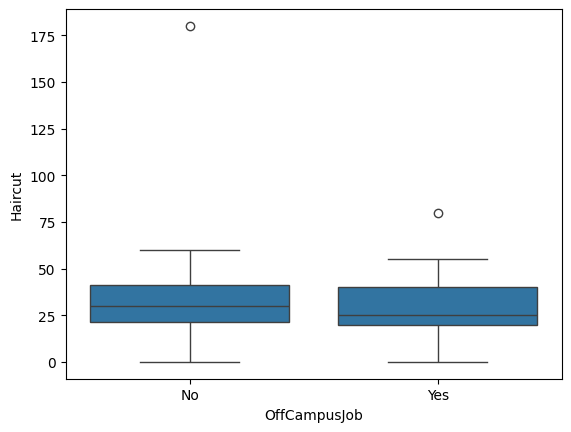

In [57]:
# import seaborn as sns
!pip install seaborn

import seaborn as sns


# Create the side-by-side boxplots
# 
sns.boxplot(x="OffCampusJob", y="Haircut", data=firstday)



There does not seem to be a relationship between having an off campus job and the amount paid for your last haircut.  The reason for that is that when we change categories (No to Yes or Yes to No) the distribution of the variable *Haircut* doesn't seem to change. 

Let's look at time to campus vs whether or not North Carolina is home.

<Axes: xlabel='NCHome', ylabel='TimeToCampus'>

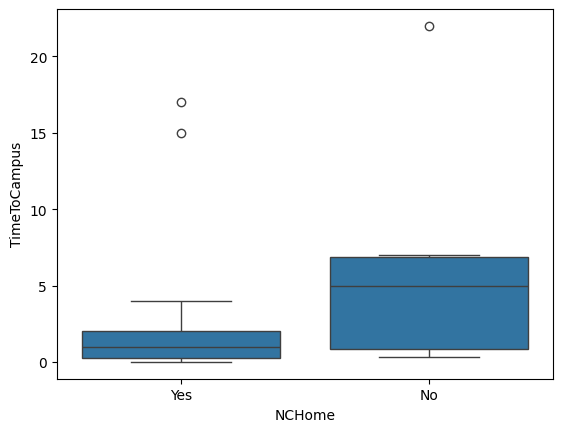

In [58]:
# Create the side-by-side boxplots
# 
sns.boxplot(x="NCHome", y="TimeToCampus", data=firstday)

This time there seems to be a relationship here since the distribution of TimeToCampus for those who do not consider North Carolina home is different from the distribution of TimeToCampus for those that do.  In particular, the median for the 'No' group is considerably higher than that of the 'Yes' group.  

So far we have only done categorical groups with two categories.  If we move to categorical variables with more levels/categories, the code stays the same.  Note that the sample size in each group may drop and so the distributions can have some variability that might just be do to the fact that there are few observations within a give level/category.

<Axes: xlabel='ClassYear', ylabel='TimeToCampus'>

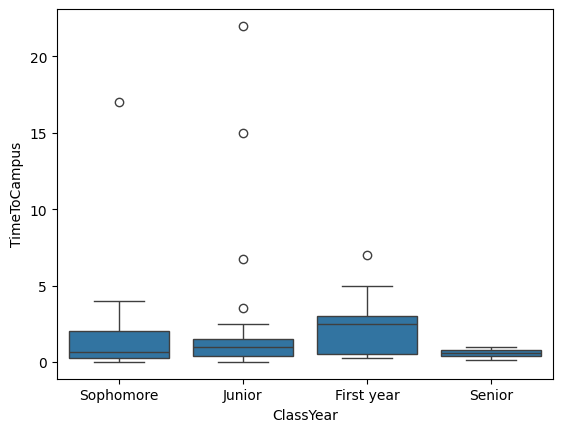

In [59]:
# Create the side-by-side boxplots
# 
sns.boxplot(x="ClassYear", y="TimeToCampus", data=firstday)

It is hard to say there are differences here though it does appear that the variation in seniors is much less than for everyone else.  First year students might have the highest median.  

<Axes: xlabel='ClassYear', ylabel='NumbSiblings'>

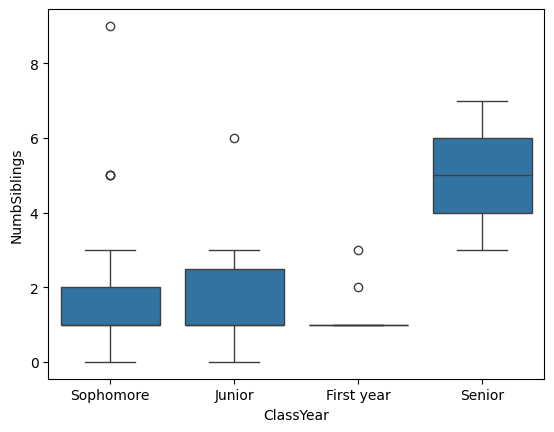

In [60]:
# Create the side-by-side boxplots
# Class year vs Number of siblings
sns.boxplot(x="ClassYear", y="NumbSiblings", data=firstday)

Does seem like there is a relationship here since seniors in our class have more siblings, on average, than other classes.

#### Categorical vs Categorical Investigation

We have not yet talked about visualizing categorical data.  First, there is broad consensus in the data visualization community that bar charts are strongly preferred to pie charts.  The reason is that they don't make for easy comparisons between groups.  We won't be making pie charts in this course. 

<Axes: xlabel='ClassYear', ylabel='proportion'>

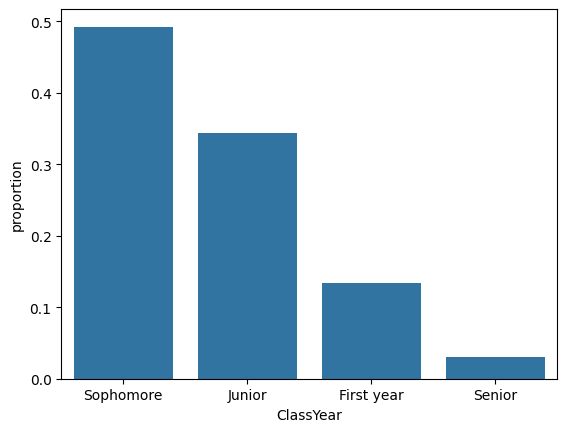

In [61]:
# for some strange reason the way to make a bar chart in seaborn is to 
# make a countplot
sns.countplot(x="ClassYear",data=firstday, stat="proportion")

<Axes: xlabel='ClassYear', ylabel='proportion'>

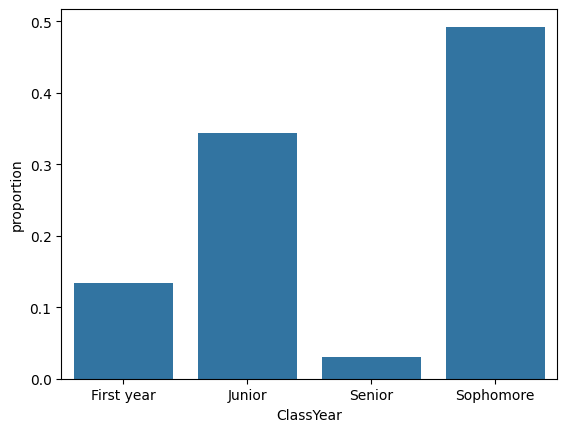

In [62]:
# the default in seaborn is to order the categories by count
# we can use the order argument of the countplot function to order the categories alphabetically
sns.countplot(x="ClassYear",data=firstday, stat="proportion",order=sorted(firstday['ClassYear'].unique()))

From this we can clearly see that the ordering for the proportion of students from particular classes with Sophomores being the most common class year, followed by Juniors.

The tool we want to use to determine if there is a relationship between two categorical variables is something called a stacked bar chart, or sometimes known as a ribbon plot.  We'll have to do a bit of coding for this since it is not something with a nice built in function in python. 

For the code below you need only need to change the dataframe (df) and the grouping variables *x_var* and *y_var* 

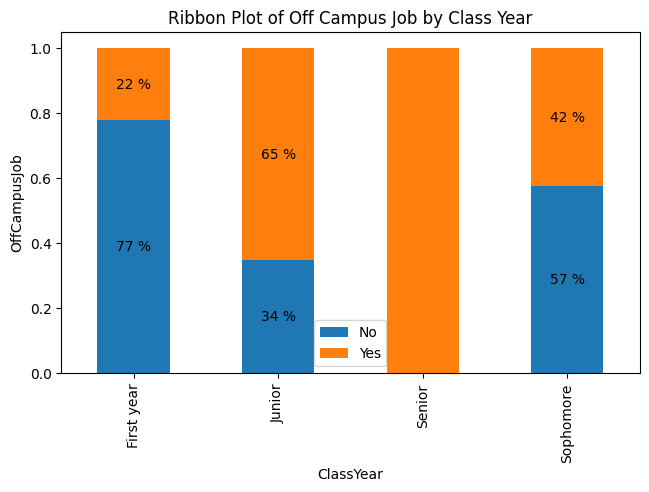

In [63]:

#
df=firstday
x_var, y_var = "ClassYear","OffCampusJob"

# create a dataframe of counts
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
# make a bar plot that is stacked
df_grouped.plot.bar(stacked=True)
# add a legend with "best" location 
plt.legend(loc="best")
# get the cumulative percents across the groups
for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.tight_layout()
#bottom_bar = mpatches.Patch(color='lightblue', label='NC Home = Yes')
#plt.legend(handles=[bottom_bar])
plt.ylabel(y_var)
plt.title("Ribbon Plot of Off Campus Job by Class Year")
# show the graph
plt.show()

Note that 22% here represents the percent of First Years who have off campus jobs, while 34% is the percent of juniors who do not have off campus jobs.  

There seems to be a relationship here between class year and whether or not a student in our class has an off campus job since the percent of juniors who have off campus jobs is much higher, $65\%$, than the percent of first years who have off campus jobs, $22\%$.

Next we will look at whether or not Charlotte being home is related to whether or not a student has a campus job.

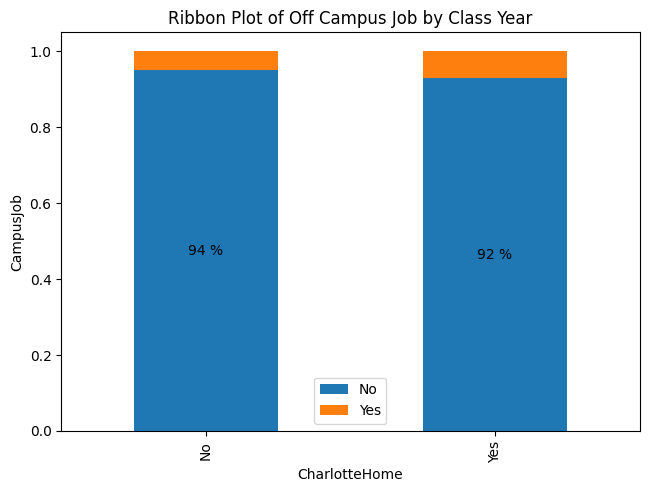

In [64]:
#
df=firstday
x_var, y_var = "CharlotteHome","CampusJob"

# create a dataframe of counts
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
# make a bar plot that is stacked
df_grouped.plot.bar(stacked=True)
# add a legend with "best" location 
plt.legend(loc="best")
# get the cumulative percents across the groups
for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.tight_layout()
#bottom_bar = mpatches.Patch(color='lightblue', label='NC Home = Yes')
#plt.legend(handles=[bottom_bar])
plt.ylabel(y_var)
plt.title("Ribbon Plot of Off Campus Job by Class Year")
# show the graph
plt.show()

From the graph above there does not seem to be a relationship between the variables *CharlotteHome* and *CampusJob*; that is, there does not seem to be a relationship between whether or not you consider Charlotte "home" and whether or not you have a campus job.

Note that in the above, I've describe relationships as seeming to be or doesn't seem to be.  There are statistical tests for all of these relationships to determine if those relationship are discernibly different from no relationship.

Tasks

1.  Create a plot that lets you determine if there is a relationship between whether or not North Carolina is home (*NCHome*) and the number of contacts on your cell phone (*NumbContacts*).  Determine if there seems to be a relationship between these two variables/features.

2. Create a plot to see if there is a relationship between Class Year (*ClassYear*) and whether or not Charlotte is home (*CharlotteHome*).  Determine if there seems to be a relationship between these two variables/features